# Project: Investigating a TMDb Movie Dataset
***Muthukumar Palavesam | Data Analyst Nanodegree Program | Batch:12-Feb-2019***<br>
****Submitted Date: 08-Mar-2019  | Version 1.0****<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this Project I have chosen the IMDb movie database from the 
[link](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf) given by Udacity.This dataset contains information about movies collected from TMDb database and also including user ratings, revenue, runtime and budget.
>
> In this project I will go ahead and explore the answers for the below questions:<br>
> - Which Month Released Highest Number Of Movies In All Of The Years?
> - Which year has the highest release of movies?
> - Which Year Has The Highest Profit Rate?
> - Average Runtime of Movies From Year To Year?
> - Which length movies most liked by the audiences according to their popularity?
> - Movies on which month made the highest average revenue?
> - Which Genre Has The Highest Release Of Movies?
> - Top 20 Production Companies With Higher Number Of Release?
> - Find out the Top 10 High rated Movies?
> - Find out the Top 10 Profittable Movies?
> - Find out the top 10 Longest runtime Movies?

In [1]:
#import the necessary package for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Explore General Properties of the Dataset

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Read the CSV file using pandas "read_csv" function
movie_data=pd.read_csv('tmdb-movies.csv')

#checking the nature of datas by using the function called "head" and exploring two rows
movie_data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#using a "info()" function to get a concise summary of the dataframe
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Printing the number of rows and columns of intial dataset
print('The Intial Dataset now have {} number of movies and {} columns'.format(movie_data.shape[0],movie_data.shape[1]))

The Intial Dataset now have 10866 number of movies and 21 columns


### Data Cleaning (Replace this with more specific notes!)
> First we need to clean the datset before answering the above questions<br>
> - Need to check whether there is any duplicate records
> - Need to decide and remove unused columns
> - Need to check is there any columns datatype need to be change or not
> - Need to check the NaN (null value) records and if it is needed we need to perform the removal or filling the suitable records
> - Need to check any zeros in columns which will affect the calculation to conclude the results or not
> - To perform more analysis sometimes need to add the new column into dataset
> - Saving the cleaned Data

#### Data Cleaning - `Checking Duplicate Records`

In [5]:
# Finding Duplicate counts
sum(movie_data.duplicated())


1

> There is one duplicate records found in the dataset.

In [6]:
#Removing Duplicates
movie_data.drop_duplicates(inplace=True)

In [7]:
# confirm correction by rechecking for duplicates in the data
sum(movie_data.duplicated())

0

In [8]:
#Recheck the rows and columns count
print('After removal of duplicates, the dataset now have {} number of movies and {} columns'\
      .format(movie_data.shape[0],movie_data.shape[1]))

After removal of duplicates, the dataset now have 10865 number of movies and 21 columns


#### Data Cleaning - `Removing unused columns`
>  - We can see 21 columns in dataset but some columns are not required to do my data analysis process.<br>
>  - So I am going to drop the below columns:<br>
>     - 'budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords'

In [9]:
#dropping the columns 'budget_adj','revenue_adj','overview','imdb_id','homepage','tagline' using "drop()" function
movie_data.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords'],axis=1,inplace=True)

In [10]:
#Fetch one row from dataset to check whether the column had removed
movie_data.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [11]:
#Recheck the rows and columns count
print('After removal of unused columns, the dataset now have {} number of movies and {} columns'\
      .format(movie_data.shape[0],movie_data.shape[1]))

After removal of unused columns, the dataset now have 10865 number of movies and 14 columns


#### Data Cleaning - `Fixing Datatypes`

- Fixing `release_date` Data Type (`convert str to datetime`)

In [12]:
#checking the 'release_date' datatype
print('Datatype for the column "release_date" = {}'.format(type(movie_data['release_date'][0])))

Datatype for the column "release_date" = <class 'str'>


In [13]:
#convert str to datetime
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

In [14]:
#Recheck the Datatype for the column "release_data"
movie_data['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### Data Cleaning - `Checking the NaN Records in Dataset`

In [15]:
null_counts= movie_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

production_companies    1030
cast                      76
director                  44
genres                    23
dtype: int64

> From the above query results, we are clearly seeing that the `production_companies` have `1030 null values`,`cast` have `76 null values`,`director` column have `44 null values` and finally `genres` have `23 null values`.if we remove the `production_companies` null value,then more number of datas we are going to lose.so I am going to drop only `cast,director,genres`

In [16]:
#Dropping the row which contains NaN value in column cast,director,genres
movie_data.dropna(subset=['cast','director','genres'],inplace=True)

In [17]:
#Recheck the NaN counts
null_counts= movie_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

production_companies    959
dtype: int64

In [18]:
#Recheck the rows and columns count
print('After Dropping the NaN records, the dataset now have {} number of movies and {} columns'\
      .format(movie_data.shape[0],movie_data.shape[1]))

After Dropping the NaN records, the dataset now have 10731 number of movies and 14 columns


#### Data Cleaning - `Replace the zeros into NaN value`

In [19]:
#Checking min value for the dataset
zero_min_count= movie_data.min()
zero_min_count[zero_min_count == 0]

budget     0
revenue    0
runtime    0
dtype: object

> From the above query results, we are clearly seeing that the `budget,revenue,runtime` is showing as zero value. Which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results.So I am going to `replace zeros with NaN values`. So that it won't impact so much in calculations.

In [20]:
#Replace zeros with NaN value
movie_data['budget'] = movie_data['budget'].replace(0, np.NaN)
movie_data['revenue'] = movie_data['revenue'].replace(0, np.NaN)
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

In [21]:
#ReChecking the min value for the dataset
movie_data[['budget','revenue','runtime']].min()

budget     1.0
revenue    2.0
runtime    3.0
dtype: float64

#### Data Cleaning - `Adding the new column into the dataset`

In [22]:
#finding the index of the columns. So that I know in which index column, I can insert the new column
for i,v in enumerate (movie_data.columns):
    print(i,v)

0 id
1 popularity
2 budget
3 revenue
4 original_title
5 cast
6 director
7 runtime
8 genres
9 production_companies
10 release_date
11 vote_count
12 vote_average
13 release_year


In [23]:
#assigning a new column which will hold the profit values of each movie.
#In this I am using the function called "insert" which helps to insert the column values into desired column location 
#df.insert(loc, column, value)
movie_data.insert(4, 'profit', movie_data['revenue'] - movie_data['budget'])

In [24]:
#Fetch two rows from dataset to check whether the column had inserted correctly or not
movie_data.head(2)

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


#### Data Cleaning - `Saving the cleaned Data`

In [25]:
#Saving the cleaned data using the function called "to_csv"
movie_data.to_csv('cleaned_movie_data.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis


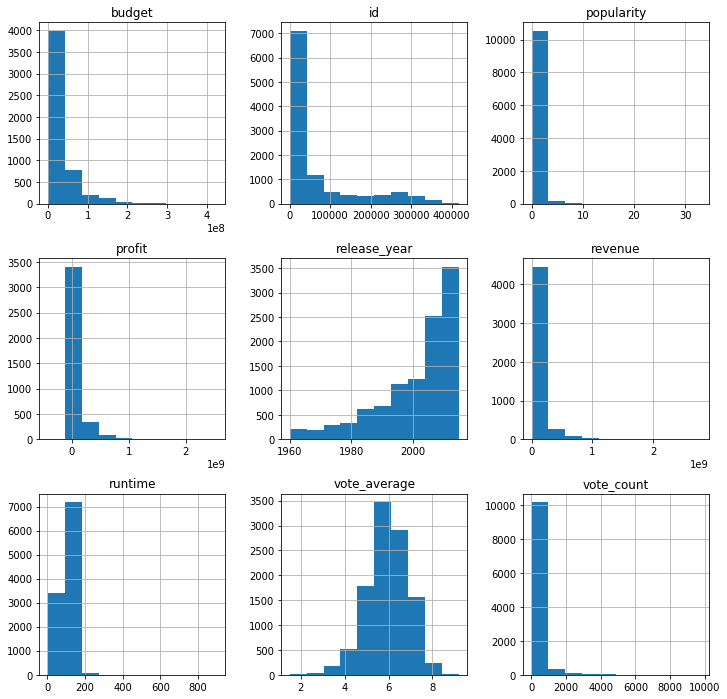

In [26]:
# Loading the cleaned Data and Exploring the histogram of the data looks like
tmdb_data=pd.read_csv('cleaned_movie_data.csv')
tmdb_data.hist(figsize=(12,12));


### Research Question 1 : Which Month Released Highest Number Of Movies In All Of The Years?

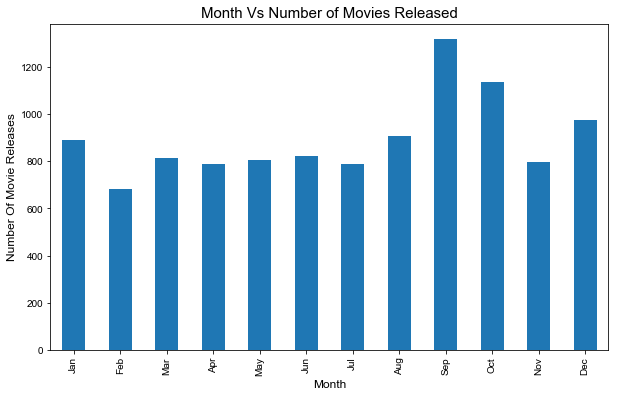

In [27]:
#convert "release_date" data type into "datetime" format
tmdb_data['release_date']=pd.to_datetime(tmdb_data['release_date'])

#count the movies in each month using value_counts().
number_of_release = tmdb_data['release_date'].dt.month.value_counts()
number_of_release.sort_index(inplace=True)

#Passing the sorted index number( 1 to 12) into "calendar.month_abbr" to get the month name(Jan to Dec)
number_of_release.index = map(lambda x: calendar.month_abbr[x], number_of_release.index)

#plot the bar graph using plot.
number_of_release.plot(kind='bar',figsize=(10,6));

#set the labels and titles of the plot.
plt.xlabel('Month',fontsize=12)
plt.ylabel('Number Of Movie Releases',fontsize=12)
plt.title('Month Vs Number of Movies Released',fontsize=15)
sns.set_style("whitegrid")

> From the above plot, `Sep` and `Oct` months there are more number of movies released.

### Research Question 2 : Which year has the highest release of movies?

2014    682
2013    649
2015    617
2012    574
2011    532
Name: release_year, dtype: int64


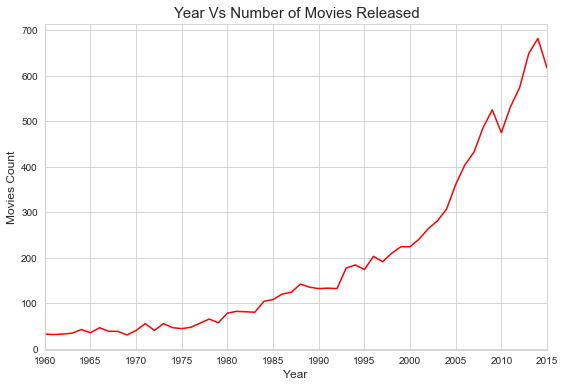

In [28]:
#prinitng five records of data to show which year has the highest release of movies count.
print(tmdb_data['release_year'].value_counts().sort_values(ascending = False).head());

#count the movies in each year using value_counts() ,Sorting the index in ascending year and plot the graph
tmdb_data['release_year'].value_counts().sort_index().plot(xticks=np.arange(1960,2016,5),color='R',figsize=(9,6));

#set the labels and titles of the plot.
plt.xlabel('Year',fontsize=12)
plt.ylabel('Movies Count',fontsize=12)
plt.title('Year Vs Number of Movies Released',fontsize=15);

> According to the above plot more number of movies released in 2014 (682 movies) followed by year 2013 (649 movies) and year 2015 (617 movies)

### Research Question 3 : Which Year Has The Highest Profit Rate?

release_year
2015    1.189509e+08
2012    1.055156e+08
2014    1.010679e+08
1977    9.175308e+07
1975    8.980081e+07
Name: profit, dtype: float64


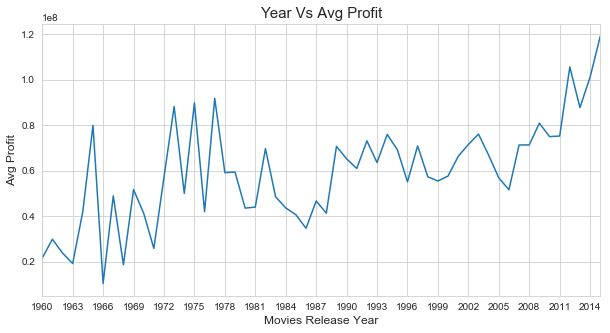

In [29]:
#prinitng five records of data to show which year has the highest profit rate.
print(tmdb_data.groupby('release_year')['profit'].mean().sort_values(ascending = False).head())

#grouping the data according to their release_year and find the mean profit and plot.
tmdb_data.groupby('release_year')['profit'].mean().plot(xticks= np.arange(1960,2016,3),figsize=(10,5));

#set the labels and titles of the plot.
plt.xlabel('Movies Release Year',fontsize=12)
plt.ylabel('Avg Profit',fontsize=12)
plt.title('Year Vs Avg Profit',fontsize=15);

> According to the plot, The Average profit has gradually `increased from year 2012 and highest on 2015` also the profit was very `low between the years 1960 and 1970`.

### Research Question 4 : Average Runtime of Movies From Year To Year?

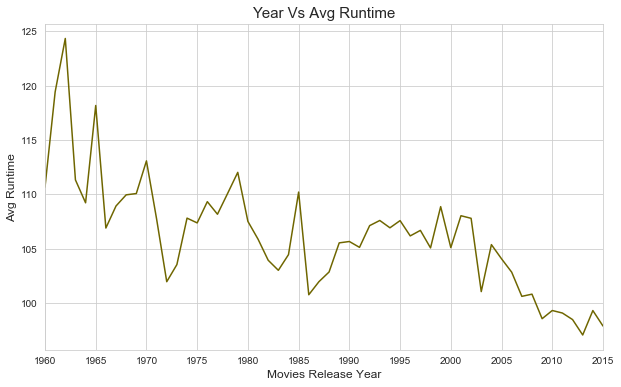

In [30]:
#grouping the data according to their release_year and find the mean runtime and plot.
tmdb_data.groupby('release_year')['runtime'].mean().plot(xticks=np.arange(1960,2016,5),color='#6f6600',figsize =(10,6));

#set the labels and titles of the plot.
plt.xlabel('Movies Release Year',fontsize=12)
plt.ylabel('Avg Runtime',fontsize=12)
plt.title('Year Vs Avg Runtime',fontsize=15);

> The above plot clearly shows that the movies duration is decreasing year by year.Next we will find out which length movies most liked by fans

### Research Question 5 : Which length movies most liked by the audiences according to their popularity?

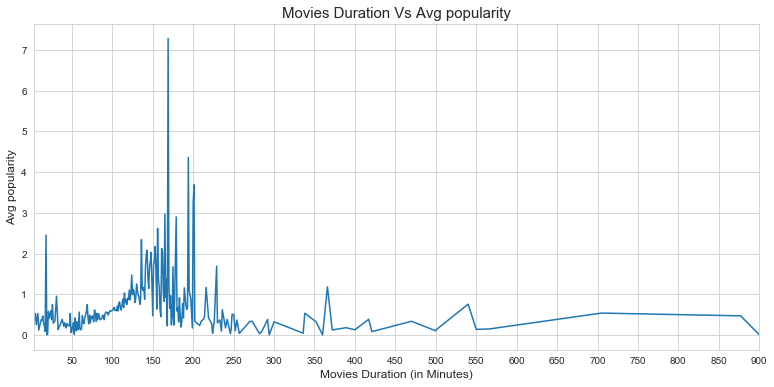

In [31]:
#grouping the data according to their runtime and find the average popularity and plot.
tmdb_data.groupby('runtime')['popularity'].mean().plot(xticks=np.arange(50,950,50),figsize=(13,6))

#set the labels and titles of the plot.
plt.xlabel('Movies Duration (in Minutes)',fontsize=12)
plt.ylabel('Avg popularity',fontsize=12)
plt.title('Movies Duration Vs Avg popularity',fontsize=15);

> From the above plot, the movies between 150 to 200 duration are more popular.

### Research Question 6 : Movies on which month made the highest average revenue?

release_date
6     1.503917e+08
5     1.363645e+08
11    1.271364e+08
12    1.197775e+08
7     1.186854e+08
Name: revenue, dtype: float64


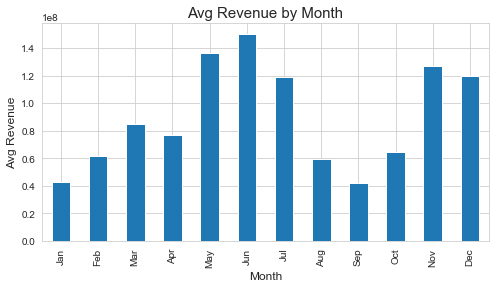

In [32]:
#Printing the top five highest average revenue based on month
print(tmdb_data.groupby(tmdb_data['release_date'].dt.month)['revenue'].mean().sort_values(ascending = False).head())

#grouping the data according to their month number and find the average revenue
month_release=tmdb_data.groupby(tmdb_data['release_date'].dt.month)['revenue'].mean()
month_release.sort_index(inplace=True)

#Passing the sorted index number( 1 to 12) into "calendar.month_abbr" to get the month name(Jan to Dec)
month_release.index=map(lambda x:calendar.month_abbr[x],month_release.index)

#plot the bar graph using plot.
month_release.plot(kind='bar',figsize=(8,4));

#set the labels and titles of the plot.
plt.xlabel('Month',fontsize=12)
plt.ylabel('Avg Revenue',fontsize=12)
plt.title('Avg Revenue by Month',fontsize=15);

> According to the plot, the movies which released in may or june month made the high revenue than other months. 

### Research Question 7 : Which Genre Has The Highest Release Of Movies?

In [33]:
#Checking how the genres columns data look like
tmdb_data['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

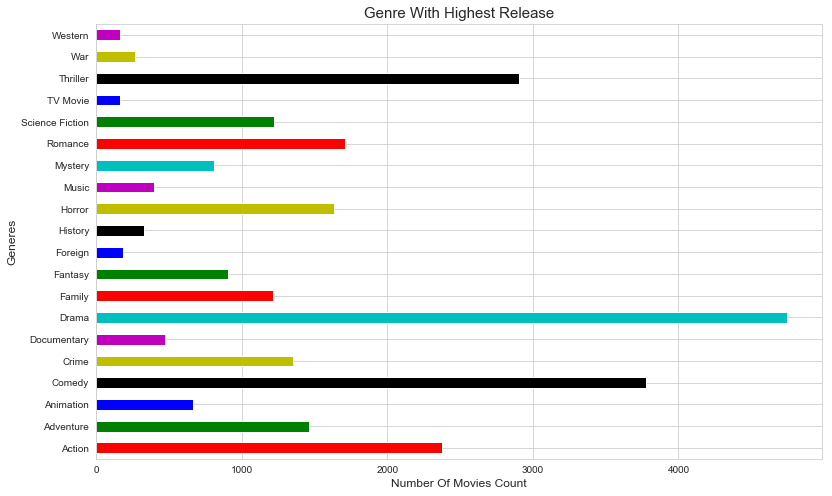

In [34]:
#creating the list to store the colors and assign into trhe variable called my_colors
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

#str.cat is used to concatenate the string and then split the string based on the symbol
#convert into pandas series and count the generes using value_counts
#sort the data by index and plot the bar graph using plot.
pd.Series(tmdb_data['genres'].str.cat(sep='|').split('|')).value_counts().\
sort_index().plot(kind='barh',figsize=(13,8),color=my_colors);

#giving the custom value to the labelsize to show better visible
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=13)

#set the labels and titles of the plot.
plt.xlabel('Number Of Movies Count',fontsize=12)
plt.ylabel('Generes',fontsize=12)
plt.title('Genre With Highest Release',fontsize=15);

Drama       4746
Comedy      3775
Thriller    2902
Action      2376
Romance     1708
dtype: int64


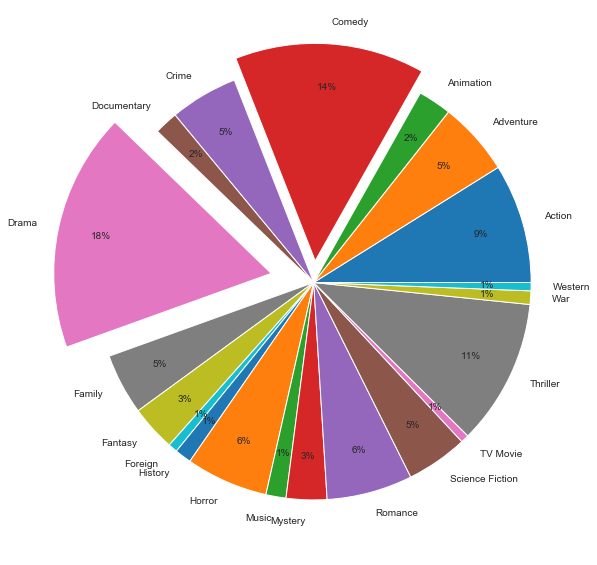

In [35]:
#plot the pie graph using plot.
print(pd.Series(tmdb_data['genres'].str.cat(sep='|').split('|')).value_counts().sort_values(ascending=False).head())
explode = (0, 0, 0,0.1,0, 0, 0.2, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0)
pd.Series(tmdb_data['genres'].str.cat(sep='|').split('|')).value_counts().\
sort_index().plot(kind='pie',figsize=(10,10),autopct='%1.0f%%',explode=explode,pctdistance=.8);
plt.ylabel("");


> The above bar and pie charts clearly showing `Drama` and `Comedy` genre has the highest release.

### Research Question 8 : Top 20 Production Companies With Higher Number Of Release?

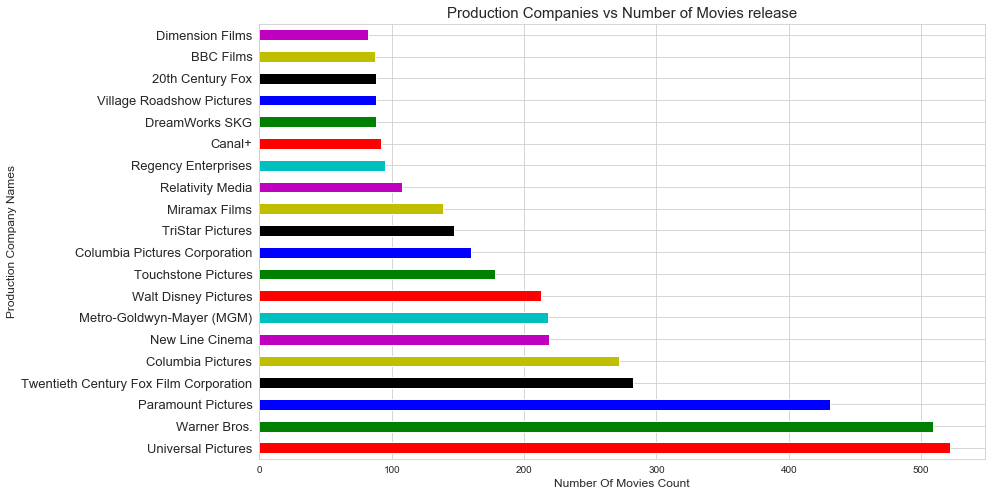

In [36]:
#str.cat is used to concatenate the string and then split the string based on the symbol
#convert into pandas series and count the generes using value_counts
#sort the data by values and plot the horizontal bar graph using plot.
pd.Series(tmdb_data['production_companies'].str.cat(sep='|').split('|'))\
.value_counts().sort_values(ascending=False).head(20)\
.plot(kind='barh',figsize=(13,8),color=my_colors);

#giving the custom value to the labelsize to show better visible
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=13)

#set the labels and titles of the plot.
plt.xlabel('Number Of Movies Count',fontsize=12)
plt.ylabel('Production Company Names',fontsize=12)
plt.title('Production Companies vs Number of Movies release',fontsize=15);

> From the above chart , the movies released by the production companies named `Universal Pictures (522 movies),Warner Bros (509 movies),Paramount Pictures (431 movies)` are the highest counts.

### Research Question 9 : Find out the Top 10 High rated Movies?

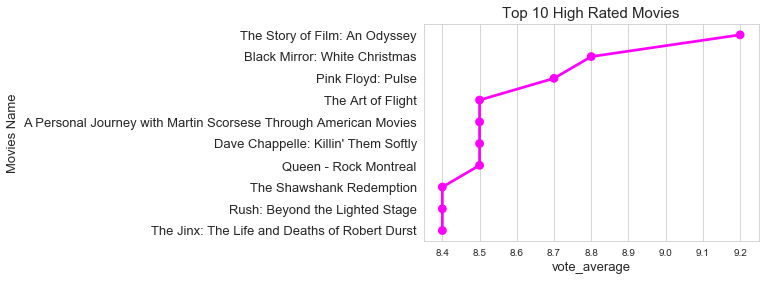

In [37]:
#sort the 'vote_average' column in decending order and store it in the new dataframe.
top10_rated = tmdb_data.sort_values('vote_average',ascending=False).head(10)

#make the point plot and setup the title and labels.
sns.pointplot(top10_rated['vote_average'],top10_rated['original_title'],color='magenta');
plt.rc('ytick', labelsize=13)
plt.title("Top 10 High Rated Movies",fontsize = 15)
plt.xlabel("vote_average",fontsize = 13)
plt.ylabel("Movies Name",fontsize = 13);



> As we can see that movie 'The Story of Film: An Odyssey' has the maximum rating (92%).

### Research Question 10 : Find out the Top 10 Profittable Movies?

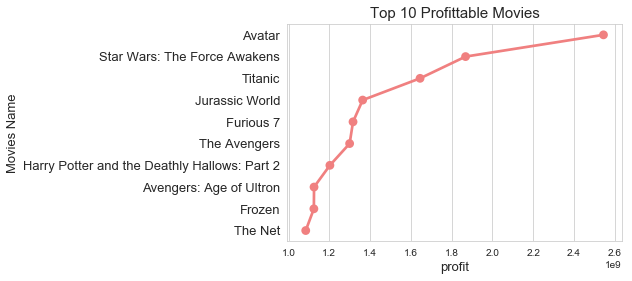

In [38]:
#sort the 'Profit' column in decending order and store it in the new dataframe
top10_profit = tmdb_data.sort_values('profit',ascending=False).head(10)

#make the point plot and setup the title and labels.
sns.pointplot(top10_profit['profit'],top10_profit['original_title'],color='lightcoral');
plt.rc('ytick', labelsize=13)
plt.title("Top 10 Profittable Movies",fontsize = 15)
plt.xlabel("profit",fontsize = 13)
plt.ylabel("Movies Name",fontsize = 13);

> As we can see that `Avatar` movie Directed by James Cameron made the highest revenue

### Research Question 11 : Find out the top 10 Longest runtime Movies?

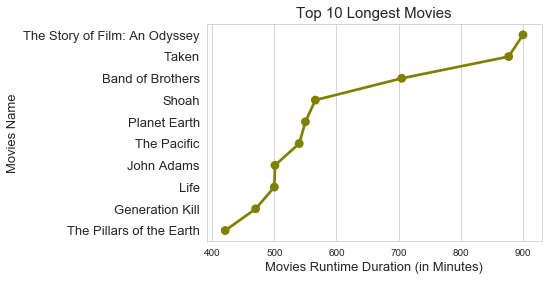

In [39]:
#sort the 'runtime' column in decending order and store it in the new dataframe.
top10_runtime = tmdb_data.sort_values('runtime',ascending=False).head(10)

#make the point plot and setup the title and labels.
sns.pointplot(top10_runtime['runtime'],top10_runtime['original_title'],color='olive');
plt.rc('ytick', labelsize=13)
plt.title("Top 10 Longest Movies",fontsize = 15)
plt.xlabel("Movies Runtime Duration (in Minutes)",fontsize = 13)
plt.ylabel("Movies Name",fontsize = 13);

> As we can see that movie 'The Story of Film: An Odyssey' has the maximum runtime duration (900 min).

<a id='conclusions'></a>
## Conclusions

> - More Number of movies released in year 2014
> - Drama, Comedy, Thriller and Action are four most-made genres.
> - 'Avatar', 'Star Wars' ,'Titanic', 'Jurassic World' are the most profitable movies.
> - Short duration movies are more popular than the long duration movies.So if we want to attract the audience , then the movies duration should be between 150-200 mins
> - Movies runtime duration are decreasing year by year
> - Best suitable month to release movies are May, Jun, Nov, Dec. Because those months are showing more avg revenue.
> - Warner Bros, Universal Pictures and Paramount Pictures production companies released more number of movies

###### Limitations :
> - Whatever analysis I did may be not 100% accurate and error free.
> - Moreover we are not sure if the data provided to us is completely corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in.
> - we are clearly seeing that the budget,revenue,runtime is showing as zero value. Which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results.So during the datacleaning process I replaced all those zeros into null values. But in actual reality those must have proper values. if that includes,then my analysis will produce different klind of results.
> - I also dropped so many missing values. This also will play huge role and impact on my overall analysis.


#### Resources I used in my analysis:

> - https://stackoverflow.com/questions/50802475/valueerror-invalid-rgba-argument-rgbkymc
> - https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
> - https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart/21580755
> - https://stackoverflow.com/questions/18674064/how-do-i-insert-a-column-at-a-specific-column-index-in-pandas
> - https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
> - https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
> - https://www.youtube.com/watch?v=yuNbn9cczjA
> - https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
